In [69]:
from package import process_dataset
from package import encoder
from package import models

import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

In [155]:
description = pd.read_csv("data/dicionario.csv", encoding='latin-1')
train = pd.read_csv("data/dados_treino_hackaton.csv", encoding='latin-1', index_col=False)
test = pd.read_csv("data/dados_teste_x_hackaton.csv", encoding='latin-1', index_col=False)

del train['Unnamed: 0']
del test['Unnamed: 0']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('id_fechou', axis=1), train['id_fechou'], test_size=0.1, random_state=11085)
X_train.to_csv('X_train.csv', index=False, encoding='latin-1')
X_test.to_csv('X_test.csv', index=False, encoding='latin-1')
y_train.to_csv('y_train.csv', index=False, encoding='latin-1')
y_test.to_csv('y_test.csv', index=False, encoding='latin-1')

In [71]:
train = encoder.encode_DataFrame(train)
train = process_dataset.processColumns(train)

In [72]:
train_cols, target = process_dataset.generate_labels(train)

In [73]:
X = process_dataset.scaleData(train[train_cols], useSaved=False)
y = train[target]

In [76]:
for i in range(10000, 20000):
    #podemos variar o test_size de 0.1 até 0.2 ver como os modelos treinam melhor
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    pred = lin.predict(X_test)
    ypred = models.convertPredicted(pred)
    
    if models.accuracy_score(y_test, ypred) > 0.87:
        print(i, models.accuracy_score(y_test, ypred))
        break

11085 0.8709677419354839


In [81]:
#X_train, X_test, y_train, y_test = train_test_split(train.drop('id_fechou', axis=1), train['id_fechou'], test_size=0.1, random_state=11085)
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11085)

## Linear regression

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lin = LinearRegression()

In [161]:
lin.fit(X_train, y_train)

LinearRegression()

In [162]:
pred = lin.predict(X_test)

In [163]:
ypred = models.convertPredicted(pred)

models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.92      0.79      0.85        28

    accuracy                           0.87        62
   macro avg       0.88      0.86      0.87        62
weighted avg       0.88      0.87      0.87        62

Accuracy score:  0.8709677419354839
Mean Squared Error:  0.12903225806451613
roc_auc score:  0.8634453781512604





In [166]:
X_train.shape

(551, 22)

In [167]:
joblib.dump(lin, 'model')

['model']

In [14]:
import joblib

In [90]:
ypred = models.convertPredicted(pred)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.92      0.79      0.85        28

    accuracy                           0.87        62
   macro avg       0.88      0.86      0.87        62
weighted avg       0.88      0.87      0.87        62

Accuracy score:  0.8709677419354839
Mean Squared Error:  0.12903225806451613
roc_auc score:  0.8634453781512604





In [17]:
x = pd.DataFrame()

In [18]:
x['id_fechou'] = ypred

In [19]:
x['prob_id_fechou'] = pred

In [20]:
x

,id_fechou,prob_id_fechou
0,1,0.597386
1,0,0.292211
2,0,0.177292
3,0,0.457811
4,0,0.373279
...,...,...
57,0,0.188801
58,1,0.989737
59,0,0.439796
60,1,0.573922


In [21]:
import matplotlib.pyplot as plt

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [23]:
import ast

In [24]:
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.74      0.76        38\n           1       0.62      0.67      0.64        24\n\n    accuracy                           0.71        62\n   macro avg       0.70      0.70      0.70        62\nweighted avg       0.71      0.71      0.71        62\n'

In [25]:
#ast.literal_eval(str(confusion_matrix(y_test, ypred)).replace(" ", ","))

In [26]:
fpr, tpr, _  = roc_curve(y_test,  pred)

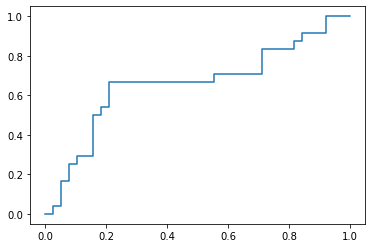

In [27]:
plt.plot(fpr,tpr)

## Decision tree regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [93]:
models.run_analysis(tree.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        34
           1       0.54      0.68      0.60        28

    accuracy                           0.60        62
   macro avg       0.60      0.60      0.60        62
weighted avg       0.61      0.60      0.60        62

Accuracy score:  0.5967741935483871
Mean Squared Error:  0.4032258064516129
roc_auc score:  0.6039915966386555





## Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
ypred = models.convertPredicted(forest.predict(X_test))

In [97]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        34
           1       0.70      0.68      0.69        28

    accuracy                           0.73        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.73      0.73      0.73        62

Accuracy score:  0.7258064516129032
Mean Squared Error:  0.27419354838709675
roc_auc score:  0.7216386554621849





## Testing polynomial regressor

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
p = PolynomialFeatures(degree = 3, include_bias=False)

In [100]:
pX_train = p.fit_transform(X_train)

In [101]:
lin = LinearRegression()
lin.fit(pX_train, y_train)

LinearRegression()

In [102]:
pred = lin.predict(p.transform(X_test))
ypred = models.convertPredicted(pred)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        34
           1       0.50      0.50      0.50        28

    accuracy                           0.55        62
   macro avg       0.54      0.54      0.54        62
weighted avg       0.55      0.55      0.55        62

Accuracy score:  0.5483870967741935
Mean Squared Error:  0.45161290322580644
roc_auc score:  0.5441176470588235





## SGD Regression

In [103]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

from sklearn.base import clone

In [104]:
sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [105]:
minimal_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(6000):
    sgd.fit(X_train, y_train)
    y_val_pred = sgd.predict(X_test)
    val_error = mean_squared_error(y_test, y_val_pred)
    if val_error < minimal_error:
        minimal_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)


In [106]:
ypred = models.convertPredicted(sgd.predict(X_test))
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.92      0.79      0.85        28

    accuracy                           0.87        62
   macro avg       0.88      0.86      0.87        62
weighted avg       0.88      0.87      0.87        62

Accuracy score:  0.8709677419354839
Mean Squared Error:  0.12903225806451613
roc_auc score:  0.8634453781512604





## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
log = LogisticRegression()

In [109]:
log.fit(X_train, y_train)

LogisticRegression()

In [110]:
ypred = log.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        34
           1       0.88      0.79      0.83        28

    accuracy                           0.85        62
   macro avg       0.86      0.85      0.85        62
weighted avg       0.86      0.85      0.85        62

Accuracy score:  0.8548387096774194
Mean Squared Error:  0.14516129032258066
roc_auc score:  0.8487394957983192





## Support vector machines

In [111]:
from sklearn.svm import LinearSVC

In [112]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [113]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.92      0.79      0.85        28

    accuracy                           0.87        62
   macro avg       0.88      0.86      0.87        62
weighted avg       0.88      0.87      0.87        62

Accuracy score:  0.8709677419354839
Mean Squared Error:  0.12903225806451613
roc_auc score:  0.8634453781512604





In [114]:
from sklearn.svm import SVC

In [115]:
svm = SVC(kernel='poly', C=10)
svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [116]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        34
           1       0.68      0.61      0.64        28

    accuracy                           0.69        62
   macro avg       0.69      0.69      0.69        62
weighted avg       0.69      0.69      0.69        62

Accuracy score:  0.6935483870967742
Mean Squared Error:  0.3064516129032258
roc_auc score:  0.6859243697478992





## Decision tree classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [119]:
ypred = tree.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        34
           1       0.75      0.54      0.63        28

    accuracy                           0.71        62
   macro avg       0.72      0.69      0.69        62
weighted avg       0.72      0.71      0.70        62

Accuracy score:  0.7096774193548387
Mean Squared Error:  0.2903225806451613
roc_auc score:  0.6943277310924368





In [120]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [137]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
xgb = xgboost.XGBClassifier()
lin = LinearRegression()

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [144]:
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('xgb', xgb)], voting='soft'
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))],
                 voting='soft')

In [145]:
ypred = voting.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        34
           1       0.73      0.68      0.70        28

    accuracy                           0.74        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.74      0.74      0.74        62

Accuracy score:  0.7419354838709677
Mean Squared Error:  0.25806451612903225
roc_auc score:  0.7363445378151261





In [146]:
voting.predict_proba

<bound method VotingClassifier.predict_proba of VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                           

In [147]:
import xgboost

In [148]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [149]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        34
           1       0.62      0.71      0.67        28

    accuracy                           0.68        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.68      0.68      0.68        62

Accuracy score:  0.6774193548387096
Mean Squared Error:  0.3225806451612903
roc_auc score:  0.680672268907563





In [150]:
xgb = xgboost.XGBClassifier(
        max_depth=2,
        gamma=0.1,
        eta=1.5,
        reg_alpha=1.1,
        reg_lambda=0.7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1.5,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1.1, ...)

In [151]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        34
           1       0.62      0.57      0.59        28

    accuracy                           0.65        62
   macro avg       0.64      0.64      0.64        62
weighted avg       0.64      0.65      0.64        62

Accuracy score:  0.6451612903225806
Mean Squared Error:  0.3548387096774194
roc_auc score:  0.6386554621848739





In [152]:
from sklearn.metrics import accuracy_score
import xgboost

In [67]:
def run_XGB(X_train, X_test, y_train, y_test, max_depth=2, gamma=0.3, eta=0.5, reg_alpha=0.5, reg_lambda=0.7, prints=False):

    model = xgboost.XGBClassifier(
        max_depth=max_depth,
        gamma=gamma,
        eta=eta,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    
    return model, acc 

In [68]:
lm = 0
for md in np.arange(1, 5):
    for gam in np.arange(0.1, 3, 0.2):
        for eta in np.arange(0.1, 2, 0.2):
            for ra in np.arange(0.1, 1.5, 0.2):
                for rl in np.arange(0.1, 1.5, 0.2):
                    _, r = run_XGB(X_train, X_test, y_train, y_test, md, gam, eta, ra, rl)
                    if r > lm:
                        lm = r
                        print("HIGHER ", lm)
                        print(md, gam, eta, ra, rl)
                        print("")

HIGHER  0.6129032258064516
1 0.1 0.1 0.1 0.1

HIGHER  0.6290322580645161
1 0.1 0.1 0.9000000000000001 0.7000000000000001



KeyboardInterrupt: 

# Fine Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = [
    {'n_estimators': [3, 7, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 7, 10, 12], 'max_features': [2, 3, 4, 8, 12, 15]},
]

In [61]:
forest = RandomForestRegressor()

In [62]:
grid = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True, refit=True)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 7, 10, 20, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 8, 12, 15],
                          'n_estimators': [3, 7, 10, 12]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid.best_params_

{'max_features': 6, 'n_estimators': 20}

In [65]:
ypred = models.convertPredicted(grid.predict(X_test))

In [66]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        63
           1       0.69      0.57      0.62        60

    accuracy                           0.67       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.67      0.67      0.66       123

Accuracy score:  0.6666666666666666
Mean Squared Error:  0.3333333333333333
roc_auc score:  0.6642857142857143





## Importancia de colunas

In [68]:
sorted(zip(grid.best_estimator_.feature_importances_, train_cols))

[(0.007352370756300068, 'Produtos digitais'),
 (0.011183698020567599, 'Desdobramento de metas'),
 (0.014418867149368728, 'Processes Excellence'),
 (0.015982270336099787, 'n_solucoes'),
 (0.016747719144998983, 'Gestão da Receita_per_Gestão de Gastos'),
 (0.027593004968354252, 'Gestão da Operação'),
 (0.027860640436120594, 'numero_relacionamentos_convertidos'),
 (0.031658920749696236, 'Forma_de_Contratacao_Agregado'),
 (0.0353008932817207, 'numero_relacionamentos'),
 (0.036211275838360445, 'Faixa_de_Faturamento_Agregado'),
 (0.038508712551839866, 'Carteira_Nova'),
 (0.04317476382889312, 'Classificacao_da_Oportunidade'),
 (0.051019106282418236, 'Segmentacao'),
 (0.05411990942274823,
  'numero_relacionamentos_convertidos_per_numero_relacionamentos'),
 (0.055098638781501216, 'intervalo_tempo'),
 (0.056771482002475816, 'Segmento_Agregado2'),
 (0.06473088705900854, 'Total_HH'),
 (0.0648181169745398, 'Valor_corrigido2'),
 (0.0742810738893781, 'Data_Real_de_Encerramento_da_Opp2'),
 (0.086004655

## Using cross validation

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [70]:
scores = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=10)

In [73]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [74]:
display_scores(np.sqrt(-scores))

Scores:  [0.53881591 0.5819877  0.5819877  0.55809982 0.65286255 0.66529914
 0.57259833 0.52790958 0.6005462  0.6005462 ]
Mean:  0.5880653123548789
Std:  0.0421076487647239


In [75]:
models.run_analysis(cross_val_predict(tree, X, y, cv=10), y)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       326
           1       0.68      0.49      0.57       287

    accuracy                           0.65       613
   macro avg       0.66      0.64      0.64       613
weighted avg       0.66      0.65      0.64       613

Accuracy score:  0.6525285481239804
Mean Squared Error:  0.3474714518760196
roc_auc score:  0.6428838631068168



